# Image Enhancement Static Demo

This notebook intends to demonstrate the use and application of image enhancement algorithms, more specically, the CLAHE and Red Free algorithms.

## Preset of the environment: Loading libraries and defining functions

In [1]:
# Importing specific libraries
import cv2
import matplotlib.pyplot as pyplot
import numpy as np

## plot the graphics on new windows
#%matplotlib qt

## plot the graphics inside the cells
%matplotlib inline

In [2]:
#Define some constants
CLAHE_CLIP_LIMIT = 3.0
CLAHE_TILE_GRID_SIZE = (8,8)
NORMAL_IMG_PATH = 'imgs/raw/normal.jpg'
COTTON_WOOL_IMG_PATH = 'imgs/raw/cotton-wool.jpg'

In [3]:
def applyCLAHE(image, clipLimit=CLAHE_CLIP_LIMIT, tileGridSize=CLAHE_TILE_GRID_SIZE):

    #-----Converting image to LAB Color model----------------------------------- 
    labImage = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    #-----Splitting the LAB image to different channels-------------------------
    lChannel,aChannel,bChannel = cv2.split(labImage)

    #-----Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    claheLChannel = clahe.apply(lChannel)

    #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    claheLABImage = cv2.merge((claheLChannel,aChannel,bChannel))

    #-----Converting image from LAB Color model to RGB model--------------------
    claheFinalImage = cv2.cvtColor(claheLABImage, cv2.COLOR_LAB2BGR)

    return claheFinalImage

def redFree(image):
    #-----Split Channels--------------------------------------------------------
    bChannel, gChannel, rChannel = cv2.split(image)
    rChannel[:] = 0

    #-----Merge the Green and BLue Channel--------------------------------------
    imageBG = cv2.merge((bChannel,bChannel,rChannel))
    
    return imageBG

In [4]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    pyplot.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        pyplot.subplot(1, n, i + 1)
        pyplot.xticks([])
        pyplot.yticks([])
        pyplot.title(' '.join(name.split('_')).title())
        pyplot.imshow(image)

## Applying the algorithm and visualizing the outputs

### Normal Image - Without abnormalities

In [5]:
img = cv2.imread(NORMAL_IMG_PATH)
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

imgCLAHE = applyCLAHE(img)
imgCLAHE_RGB = cv2.cvtColor(imgCLAHE, cv2.COLOR_BGR2RGB)

#### CLAHE Output

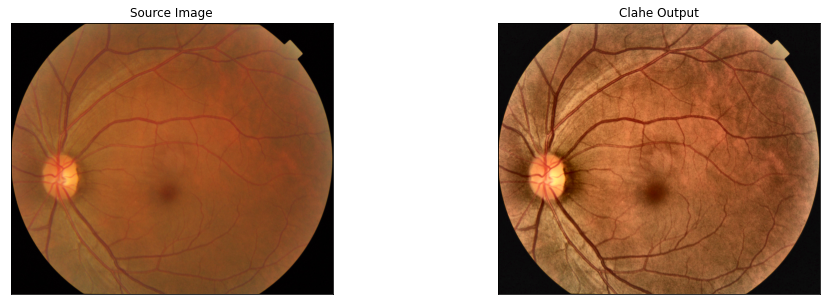

In [6]:
visualize(Source_Image = img_RGB,CLAHE_Output = imgCLAHE_RGB)

#### Red Free Output

In [7]:
imgRedFree = redFree(img)
imgRedFreeGB = cv2.cvtColor(imgRedFree, cv2.COLOR_BGR2RGB)

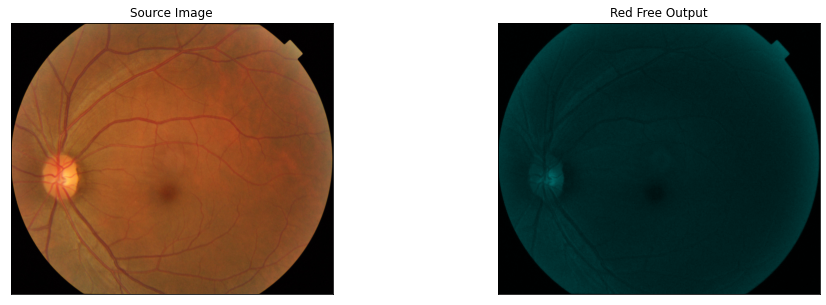

In [8]:
visualize(Source_Image = img_RGB,Red_Free_Output = imgRedFreeGB)

#### CLAHE and Red Free Stacked Output

In [9]:
imgRedFreeCLAHE = applyCLAHE(imgRedFree)
imgRedFreeCLAHEGB = cv2.cvtColor(imgRedFreeCLAHE, cv2.COLOR_BGR2RGB)

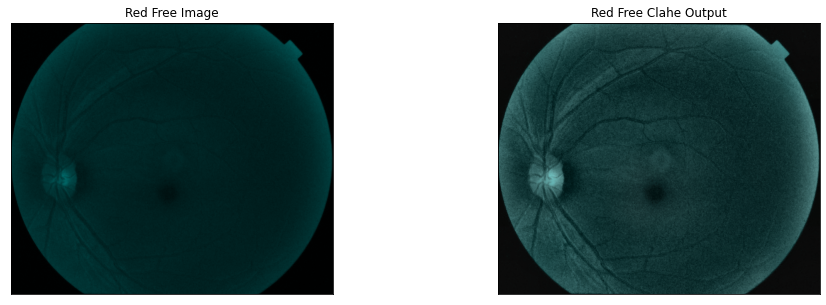

In [10]:
visualize(Red_Free_Image = imgRedFreeGB,Red_Free_CLAHE_Output = imgRedFreeCLAHEGB)

#### Overview

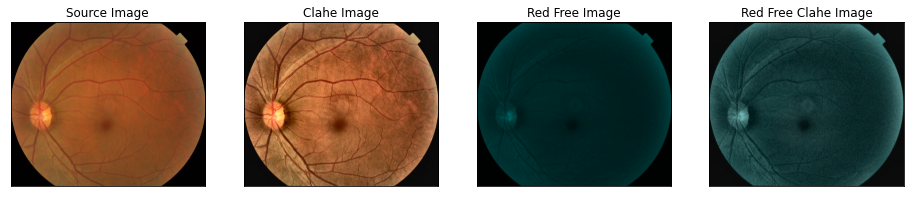

In [11]:
visualize(
    Source_Image = img_RGB,
    CLAHE_Image = imgCLAHE_RGB,
    Red_Free_Image = imgRedFreeGB,
    Red_Free_CLAHE_Image = imgRedFreeCLAHEGB)

### Cotton-wool Spots

In [12]:
imgCW = cv2.imread(COTTON_WOOL_IMG_PATH)
imgCW_RGB = cv2.cvtColor(imgCW, cv2.COLOR_BGR2RGB)

#### CLAHE Output

In [13]:
imgCWCLAHE = applyCLAHE(imgCW)
imgCWCLAHE_RGB = cv2.cvtColor(imgCWCLAHE, cv2.COLOR_BGR2RGB)

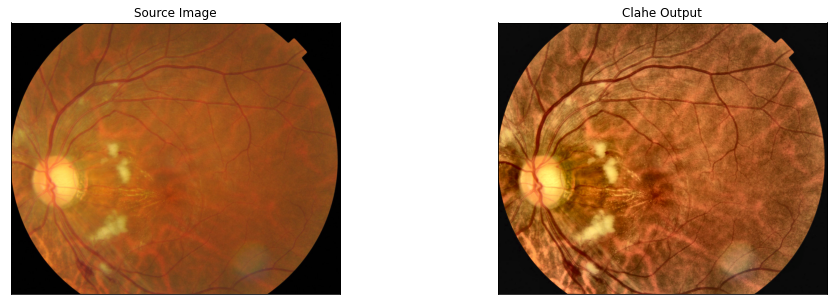

In [14]:
visualize(Source_Image = imgCW_RGB,CLAHE_Output = imgCWCLAHE_RGB)

#### Red Free Output

In [15]:
imgCWRedFree = redFree(imgCW)
imgCWRedFreeGB = cv2.cvtColor(imgCWRedFree, cv2.COLOR_BGR2RGB)

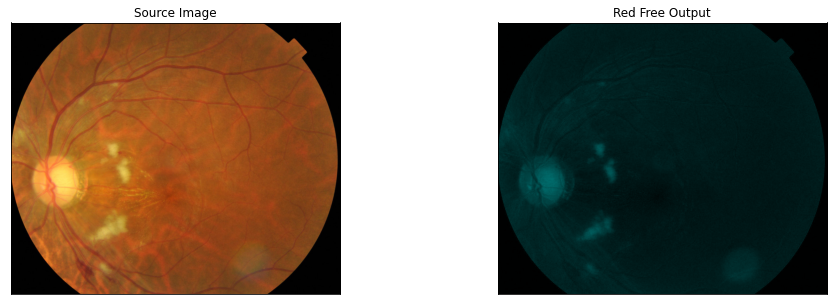

In [16]:
visualize(Source_Image = imgCW_RGB,Red_Free_Output = imgCWRedFreeGB)

#### CLAHE and Red Free Stacked Output

In [17]:
imgCWRedFreeCLAHE = applyCLAHE(imgCWRedFree)
imgCWRedFreeCLAHEGB = cv2.cvtColor(imgCWRedFreeCLAHE, cv2.COLOR_BGR2RGB)

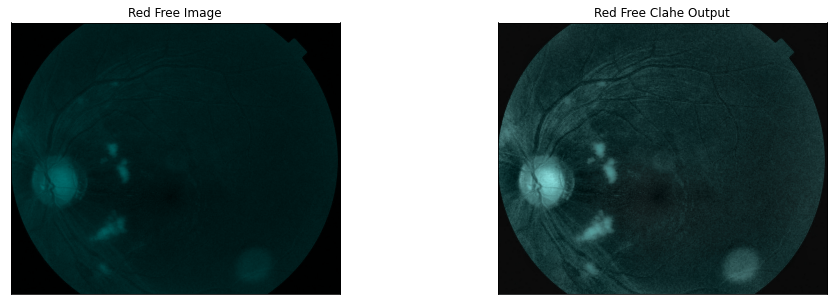

In [18]:
visualize(Red_Free_Image = imgCWRedFreeGB,Red_Free_CLAHE_Output = imgCWRedFreeCLAHEGB)

#### Overview

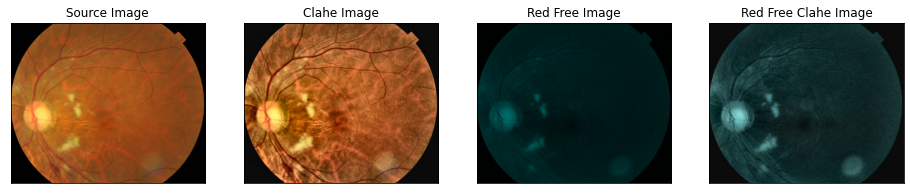

In [19]:
visualize(
    Source_Image = imgCW_RGB,
    CLAHE_Image = imgCWCLAHE_RGB,
    Red_Free_Image = imgCWRedFreeGB,
    Red_Free_CLAHE_Image = imgCWRedFreeCLAHEGB)